<a href="https://colab.research.google.com/github/absolutemocha/sdaai/blob/main/C2329C_AY2022_T3_CWF_Lim_Zhao_Hong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C2329C Machine Learning Fundamentals

## Coursework Final
***
### Student Name: $<Lim Zhao Hong>$ 
### Student ID: $<20065320>$

***

## Features description from the $CleandDataV20210515.csv$ file:

**index_col** time step for the washing cycle

**avC:** average current 

**avP:** average power

**avR:** average resistant

**maxC:** maximum current 

**maxP:** maximum power

**sdC:** standard deviation for current

**sdP:** standard deviation for power

**stdCR:** standard deviation for resistant

**stdCP:** standard deviation for power

**AvRR:** average relative resistance to previous resistance reading

**mode:** positive class: Daily Wash | negative class: Not Daily Wash


In [14]:
# Import necessary Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import library to access google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [15]:
#Grant access to file in google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Data Preparation Process

In [16]:
#Data link in google drive
fileDownloaded = drive.CreateFile({'id':'1jOG2UnniYBiMzB2vEszHXRjkIOzGR3Gq'})
fileDownloaded.GetContentFile('CleandDataV20210515.csv')

In [17]:
import pandas as pd
data = pd.read_csv('CleandDataV20210515.csv', sep=',')

data.head()

,Unnamed: 0,mode,index_col,avC,avP,sdC,sdP,avR,maxC,maxP,stdCR,stdCP,AvRR
0,0,DailyWash,0,2.225000,474.533333,3.011970,706.975234,641.340763,7.15,1632,3.011970,706.975234,641.340763
1,1,DailyWash,1,2.170200,462.000000,2.974442,700.150305,679.240121,7.18,1656,2.993026,707.624834,736.089159
2,2,DailyWash,2,3.277750,723.400000,3.327151,786.046969,503.949590,7.20,1659,3.093103,735.333466,211.798705
3,3,DailyWash,3,3.514900,778.690000,3.339524,790.007514,443.911955,7.19,1648,3.301263,786.483330,203.761414
4,4,DailyWash,4,3.012417,658.825000,3.248720,769.232288,468.640063,0.61,76,0.138488,18.963955,592.280603


In [18]:
data.head(1).T

,0
Unnamed: 0,0
mode,DailyWash
index_col,0
avC,2.225
avP,474.533333
sdC,3.01197
sdP,706.975234
avR,641.340763
maxC,7.15
maxP,1632


In [19]:
data.dtypes

Unnamed: 0      int64
mode           object
index_col       int64
avC           float64
avP           float64
sdC           float64
sdP           float64
avR           float64
maxC          float64
maxP            int64
stdCR         float64
stdCP         float64
AvRR          float64
dtype: object

In [20]:
# Remove extraneous columns
# data.drop(['mode', 'area_code', 'phone_number'], axis=1, inplace=True)

# Get a list of all the columns that don't contain the label

x_cols = [x for x in data.columns if x != 'mode']

x_data = data[x_cols]
print (x_data)

      Unnamed: 0  index_col       avC         avP       sdC         sdP  \
0              0          0  2.225000  474.533333  3.011970  706.975234   
1              1          1  2.170200  462.000000  2.974442  700.150305   
2              2          2  3.277750  723.400000  3.327151  786.046969   
3              3          3  3.514900  778.690000  3.339524  790.007514   
4              4          4  3.012417  658.825000  3.248720  769.232288   
...          ...        ...       ...         ...       ...         ...   
1026          12         12  0.497351   68.908108  0.457768   72.386738   
1027          13         13  0.484075   66.747500  0.445371   70.431137   
1028          14         14  0.467512   64.206977  0.435940   68.820644   
1029          15         15  0.466289   64.042222  0.428875   67.693074   
1030          16         16  0.496708   68.904167  0.462365   73.301214   

              avR  maxC  maxP     stdCR       stdCP         AvRR  
0      641.340763  7.15  1632  3

In [21]:
x_data.columns

Index(['Unnamed: 0', 'index_col', 'avC', 'avP', 'sdC', 'sdP', 'avR', 'maxC',
       'maxP', 'stdCR', 'stdCP', 'AvRR'],
      dtype='object')

Visualize the relationship between the variables.

In [22]:
#import seaborn as sns
#import matplotlib.pyplot as plt

##%matplotlib inline

##sns.set_context('notebook')
##sns.set_palette('dark')
##sns.set_style('white')

##sns.pairplot(data);


***

## K-Nearest Neigbors

In [23]:
#K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

##from sklearn.preprocessing import LabelBinarizer

##lb = LabelBinarizer()

##for col in ['mode']:
##    data[col] = lb.fit_transform(data[col])

In [24]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

X_data = pd.DataFrame(msc.fit_transform(x_data),  # this is an np.array, not a dataframe.
                    columns=x_data.columns)

In [25]:
# Get a list of all the columns that don't contain the label
#x_cols = [x for x in data.columns if x != 'mode']

# Split the data into two dataframes
#X_data = data[x_cols]
y_data = data['mode']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('mode')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)

In [26]:
print (X_data)
print (y_data)

      Unnamed: 0  index_col       avC       avP       sdC       sdP       avR  \
0       0.000000   0.000000  0.582733  0.562153  0.878526  0.866351  0.215837   
1       0.045455   0.045455  0.566889  0.546613  0.867005  0.857709  0.245561   
2       0.090909   0.090909  0.887111  0.870718  0.975286  0.966481  0.108082   
3       0.136364   0.136364  0.955677  0.939271  0.979085  0.971496  0.060994   
4       0.181818   0.181818  0.810396  0.790653  0.951208  0.945188  0.080388   
...          ...        ...       ...       ...       ...       ...       ...   
1026    0.545455   0.545455  0.083225  0.059227  0.094391  0.062762  0.516744   
1027    0.590909   0.590909  0.079387  0.056548  0.090585  0.060285  0.525071   
1028    0.636364   0.636364  0.074598  0.053398  0.087690  0.058246  0.541944   
1029    0.681818   0.681818  0.074244  0.053194  0.085521  0.056818  0.529064   
1030    0.727273   0.727273  0.083039  0.059222  0.095802  0.063920  0.527438   

          maxC      maxP   

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

In [28]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

print(accuracy(y_test, y_test_pred))

0.867741935483871


In [29]:
## Fit the K-nearest neighbors model again with n_neighbors=3 but this time use distance for the weights. Calculate the accuracy using the function you created above.
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn = knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

print(accuracy(y_test, y_test_pred))

0.864516129032258


In [30]:
## Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (p=1) i.e. Manhattan Distance.
knn = KNeighborsClassifier(n_neighbors=3, p=1)

knn = knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

print(accuracy(y_test, y_test_pred))

0.8258064516129032


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

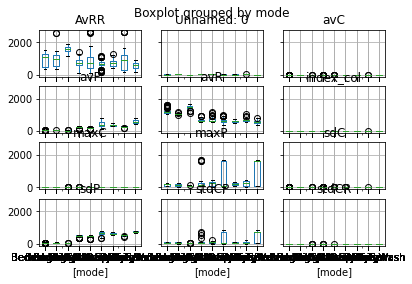

In [31]:
# Pandas boxplot

data.boxplot(by='mode');

In [32]:
#sns.set_context('mode')
#sns.pairplot(data, hue='species');


***

## Logistic Regression 

In [33]:
data = pd.read_csv('CleandDataV20210515.csv', sep=',')

data.head()

,Unnamed: 0,mode,index_col,avC,avP,sdC,sdP,avR,maxC,maxP,stdCR,stdCP,AvRR
0,0,DailyWash,0,2.225000,474.533333,3.011970,706.975234,641.340763,7.15,1632,3.011970,706.975234,641.340763
1,1,DailyWash,1,2.170200,462.000000,2.974442,700.150305,679.240121,7.18,1656,2.993026,707.624834,736.089159
2,2,DailyWash,2,3.277750,723.400000,3.327151,786.046969,503.949590,7.20,1659,3.093103,735.333466,211.798705
3,3,DailyWash,3,3.514900,778.690000,3.339524,790.007514,443.911955,7.19,1648,3.301263,786.483330,203.761414
4,4,DailyWash,4,3.012417,658.825000,3.248720,769.232288,468.640063,0.61,76,0.138488,18.963955,592.280603


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1031 non-null   int64  
 1   mode        1031 non-null   object 
 2   index_col   1031 non-null   int64  
 3   avC         1031 non-null   float64
 4   avP         1031 non-null   float64
 5   sdC         1031 non-null   float64
 6   sdP         1031 non-null   float64
 7   avR         1031 non-null   float64
 8   maxC        1031 non-null   float64
 9   maxP        1031 non-null   int64  
 10  stdCR       1031 non-null   float64
 11  stdCP       1031 non-null   float64
 12  AvRR        1031 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 104.8+ KB


In [35]:
data.iloc[:, :-1].min().value_counts()
data.iloc[:, :-1].max().value_counts()

22             2
DailyWash      1
3.6682         1
827.67         1
3.407652852    1
812.5167305    1
1641.170513    1
7.34           1
1706           1
3.423709745    1
819.1763691    1
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['mode'] = le.fit_transform(data['mode'])
data['mode'].sample(5)


345    5
87     7
728    2
647    4
135    6
Name: mode, dtype: int64

In [37]:
print(data['mode'])

0       8
1       8
2       8
3       8
4       8
       ..
1026    1
1027    1
1028    1
1029    1
1030    1
Name: mode, Length: 1031, dtype: int64


In [38]:
data.dtypes

Unnamed: 0      int64
mode            int64
index_col       int64
avC           float64
avP           float64
sdC           float64
sdP           float64
avR           float64
maxC          float64
maxP            int64
stdCR         float64
stdCP         float64
AvRR          float64
dtype: object

In [39]:
## Split the data into train and test data sets and compare the ratio of classes in both the train and test splits.
##from sklearn.model_selection import StratifiedShuffleSplit

##feature_cols = data.columns[:-1]

# Get the split indexes
##strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
##                                          test_size=0.3, 
##                                          random_state=1)

# get the locations
#X = data.iloc[:, :-1]
#y = data.iloc[:, -1]
 
# split the dataset
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.3, random_state=0)

#strat_shuf_split(X_train, y_train)

##train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.mode))

# Create the dataframes
##X_train = data.loc[train_idx, feature_cols]
##y_train = data.loc[train_idx, 'mode']

##X_test  = data.loc[test_idx, feature_cols]
##y_test  = data.loc[test_idx, 'mode']

##X_train = data.loc[train_idx, feature_cols]
##y_train = data.loc[train_idx, 'mode']

##X_test  = data.loc[test_idx, feature_cols]
##y_test  = data.loc[test_idx, 'mode']

In [40]:
##y_train.value_counts(normalize=True)

In [41]:
##y_test.value_counts(normalize=True)

In [42]:
##X_train.value_counts(normalize=True)

In [43]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import LogisticRegression


# Standard logistic regression
%time lr = LogisticRegression().fit(X_train, y_train)

CPU times: user 125 ms, sys: 6.07 ms, total: 131 ms
Wall time: 126 ms


In [44]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
%time lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

CPU times: user 40.8 s, sys: 51.6 ms, total: 40.8 s
Wall time: 42.1 s


In [45]:
# L2 regularized logistic regression
%time lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

CPU times: user 2.23 s, sys: 9.99 ms, total: 2.24 s
Wall time: 2.24 s


In [46]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

##coeff_labels = ['lr', 'l1', 'l2']
##coeff_models = [lr, lr_l1, lr_l2]

coeff_labels = ['lr', 'knn']
coeff_models = [lr, knn]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [47]:
from sklearn import pipeline, feature_selection, linear_model, preprocessing, metrics, model_selection

first_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.LinearRegression()),
])

second_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.Lasso(alpha=40)),
])

first_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('selection', SelectPercentile(percentile=50,
                    score_func=<function f_regression at 0x7f0909734170>)),
  ('regression', LinearRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'selection': SelectPercentile(percentile=50,
                  score_func=<function f_regression at 0x7f0909734170>),
 'regression': LinearRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'selection__percentile': 50,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>,
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__n_jobs': None,
 'regression__normalize': 'deprecated',
 'regression__positive': False}

Calculate the following metrics for each model using test dataset
---
* Accuracy
* Precision
* Recall
* F1 score

In [48]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
##    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
##              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
##              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy},
                              #'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

,lr,knn
precision,0.689775,0.829856
recall,0.716129,0.825806
fscore,0.666156,0.826162
accuracy,0.716129,0.825806


Generating Confusion Matrix
---
Display or plot the confusion matrix for each model.


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

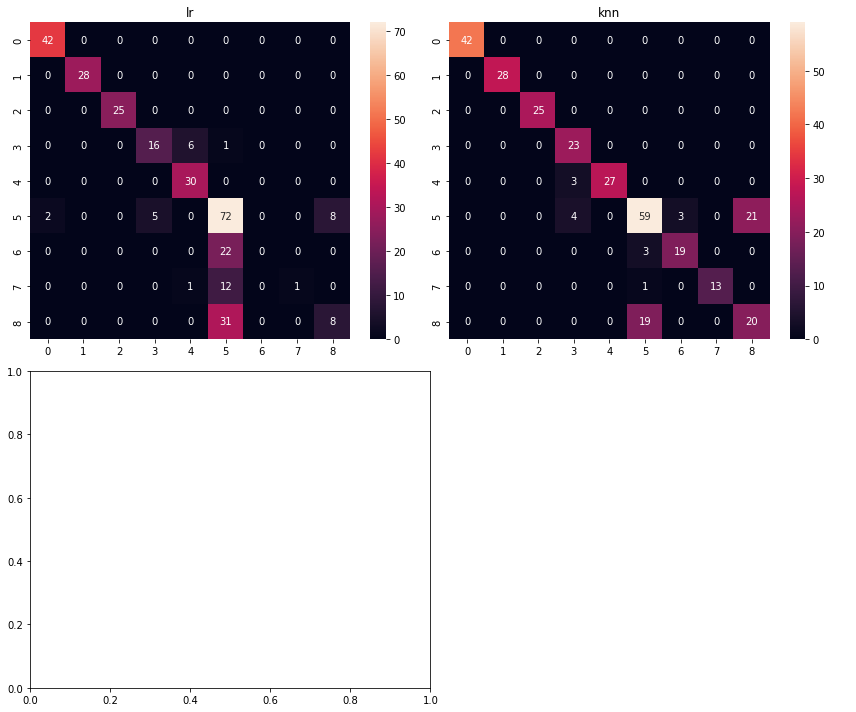

In [50]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

Learning Curve
---
To know if we are overfit or underfit, we need to plot a learning curve. A learning curve plots performance (either error or score) against some measure of complexity.



***

In [51]:
from sklearn import pipeline, feature_selection, linear_model, preprocessing, metrics, model_selection

first_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.LinearRegression()),
])

second_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.Lasso(alpha=40)),
])

first_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('selection', SelectPercentile(percentile=50,
                    score_func=<function f_regression at 0x7f0909734170>)),
  ('regression', LinearRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'selection': SelectPercentile(percentile=50,
                  score_func=<function f_regression at 0x7f0909734170>),
 'regression': LinearRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'selection__percentile': 50,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>,
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__n_jobs': None,
 'regression__normalize': 'deprecated',
 'regression__positive': False}

In [52]:
p_list = np.linspace(1, 100, 25, dtype='int')
train_score = []
test_score = []

for i, p in enumerate(p_list):

    first_pipe.set_params(selection__percentile=p)
    #second_pipe.set_params(selection__percentile=p)

    score = model_selection.cross_validate(
        first_pipe,
        X_train,
        y_train,
        scoring="r2",
        cv=5,
        return_train_score=True)

    train_score.append(score['train_score'].mean())
    test_score.append(score['test_score'].mean())
print(max(test_score))

nan


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mod', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


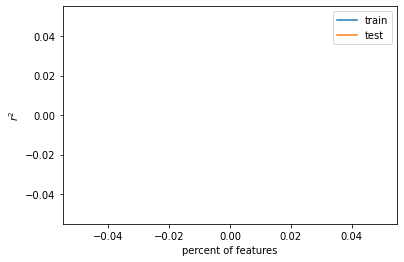

In [53]:
%pylab inline

plt.plot(p_list, train_score, label='train')
plt.plot(p_list, test_score, label='test')
plt.ylabel("$r^2$")
plt.xlabel("percent of features")
plt.legend();